## Observations and Insights 

1. Out of 10 treatment regimens (including Plecebo) the two are clearly standing out. These are Capomulin and Ramicane. They both show the smallest final tumor volumes (see Summary Statistics) and better stability (small standard deviation). Also the overall mice survivability rates during the tests (see Bar Plots) suggest good performance of Capomulin and Ramicane.

2. Line plots showing the tumor volume for the treatment with Capomulin show significant decrease of the tumor in size over time. Which suggests a good effectiveness of the drug. If we plot the same line diagrams for all mice in this drug regimen it also shows an overall (visual) tendency of the tumor shrinking toward the end of the test.

3. The tumor volume, however, correlate well with the weight of the mice. So it would be a good idea to compare the tumor volume dynamics against the mouse weight during the treatment if we had the data. In the provided data set the weight is in the meta table and doesn't reflect the weight dynamics throughout the treatments. Further research is needed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_flat = study_results.merge(mouse_metadata, on="Mouse ID")
df_flat

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice in the DataFrame.
len(df_flat["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
s1 = df_flat.duplicated(["Mouse ID", "Timepoint"])
df_flat[s1]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
corrupt_mouse = df_flat[df_flat["Mouse ID"] == "g989"]
corrupt_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped = df_flat.drop(corrupt_mouse.index)
deduped[deduped["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(deduped["Mouse ID"].unique()))
s0 = deduped.groupby("Mouse ID")["Timepoint"].count()
print(s0[s0 == 10].count())

248
130


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gby_regimen = deduped.groupby("Drug Regimen")
# Let's see how it works doing one of them:
gby_regimen["Tumor Volume (mm3)"].mean()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({
    "mean":     gby_regimen["Tumor Volume (mm3)"].mean(),
    "median":   gby_regimen["Tumor Volume (mm3)"].median(),
    "variance": gby_regimen["Tumor Volume (mm3)"].var(),
    "stdev":    gby_regimen["Tumor Volume (mm3)"].std(),
    "SEM":      gby_regimen["Tumor Volume (mm3)"].sem()
})
summary

,mean,median,variance,stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

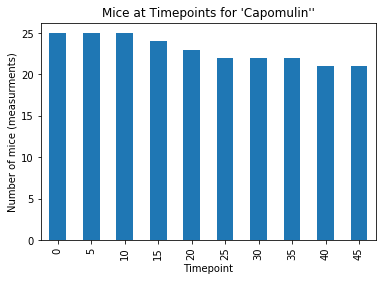

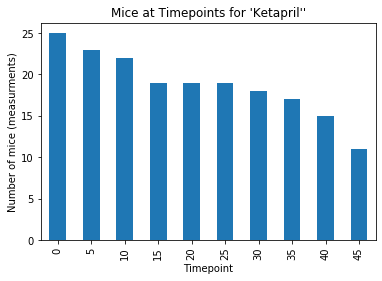

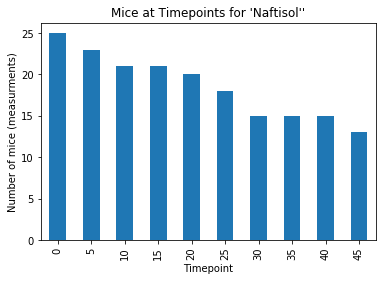

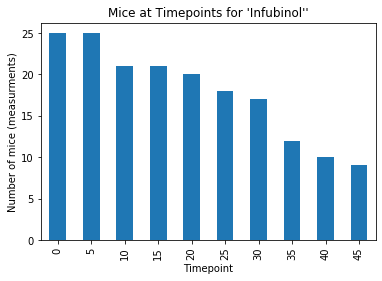

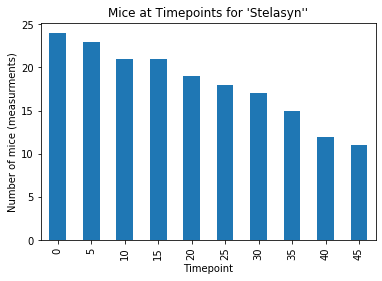

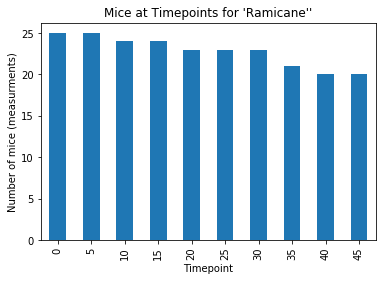

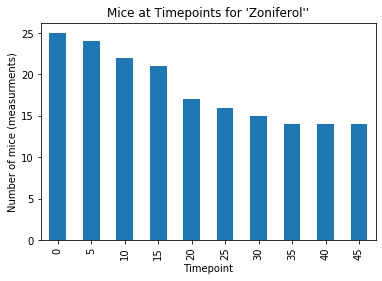

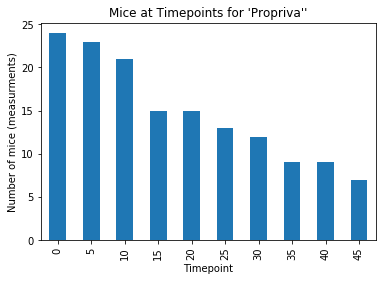

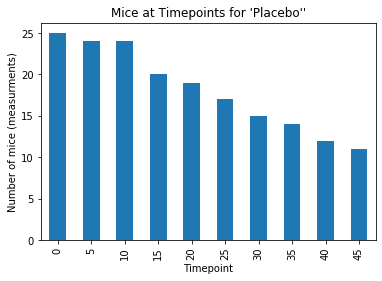

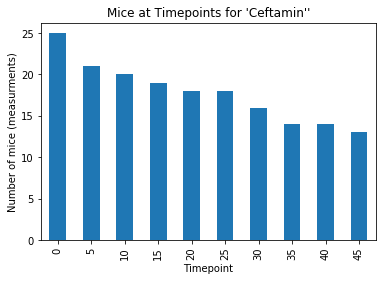

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# For each treatment
for drug in deduped["Drug Regimen"].unique():
    plt.figure()
    plt.xlabel("Timepoints")
    plt.ylabel("Number of mice (measurments)")
    df = gby_regimen["Timepoint"].value_counts()[drug]
    df.plot(kind="bar", title=f"Mice at Timepoints for '{drug}''")
plt.show()

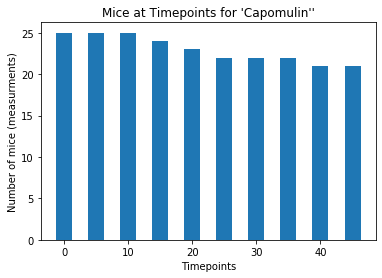

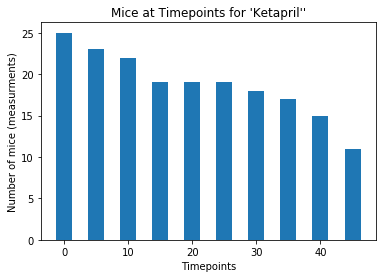

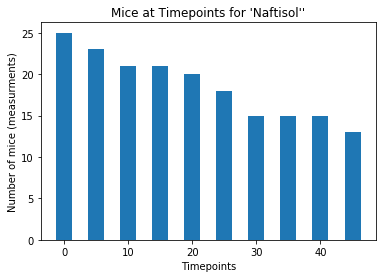

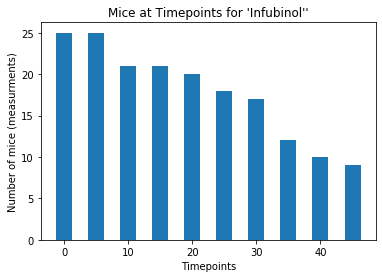

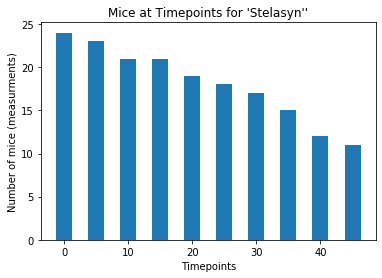

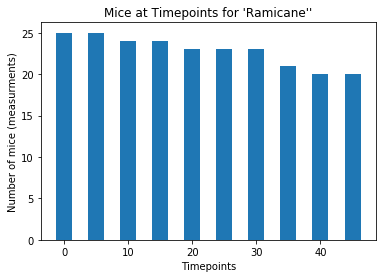

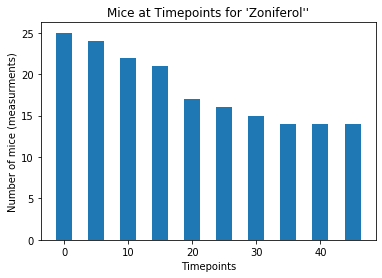

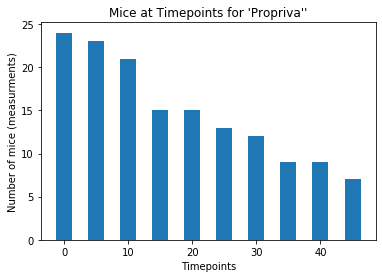

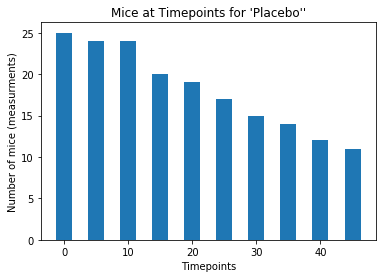

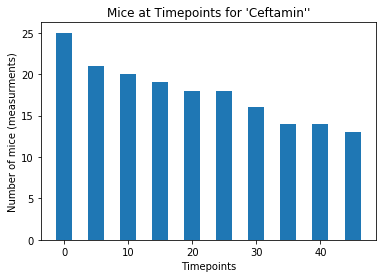

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# For each treatment
for drug in deduped["Drug Regimen"].unique():
    plt.figure()
    plt.title(f"Mice at Timepoints for '{drug}''")
    df = gby_regimen["Timepoint"].value_counts()[drug]
    plt.bar(df.index, df, width=2.5)
    plt.xlabel("Timepoints")
    plt.ylabel("Number of mice (measurments)")
plt.show()

## Pie Plots

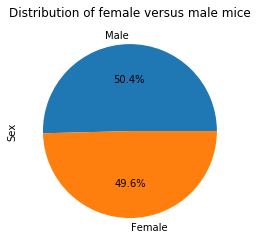

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

deduped.drop_duplicates(["Mouse ID"])["Sex"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Distribution of female versus male mice")
plt.show()

ValueError: 'label' must be of length 'x'

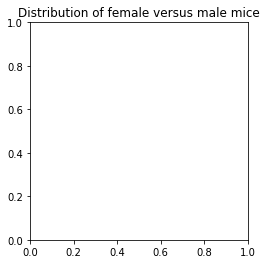

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Distribution of female versus male mice")
plt.pie(
    deduped.drop_duplicates(["Mouse ID"])["Sex"].value_counts(),
    labels = s1.index,
    autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
good_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
outliers = pd.DataFrame()
final_volumes = []
for drug in good_drugs:
  regimen_sub = deduped[deduped["Drug Regimen"] == drug]
  last_points = regimen_sub.groupby("Mouse ID")["Timepoint"].max()
  final_set = pd.DataFrame(last_points).merge(deduped, on=["Mouse ID", "Timepoint"], how="left")
  quantiles = final_set["Tumor Volume (mm3)"].quantile([.25,.5,.75])
  median = quantiles[.5]
  iqr = quantiles[.75] - quantiles[.25]
  print(f"{drug}'s Median: {median:.2f}, IQR: {iqr:.2f}")
  final_volumes.append(final_set["Tumor Volume (mm3)"])
  outliers = outliers.append(final_set[final_set["Tumor Volume (mm3)"] > quantiles[.75] + 1.5*iqr])
  outliers = outliers.append(final_set[final_set["Tumor Volume (mm3)"] < quantiles[.25] - 1.5*iqr])

print("Potential outliers: ")
print(outliers[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]])

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_volumes, labels=good_drugs,
           flierprops = {
               "marker": 'o',
               "markerfacecolor": 'yellow',
               "markersize": 10,
               "markeredgecolor": 'red'
           })
plt.title("Final tumor volume across four regimens of interest")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = deduped[deduped["Drug Regimen"] == "Capomulin"]

# Take a random mouse from the pool
r_mouse_id = capomulin_mice.iloc[42]["Mouse ID"]
print(r_mouse_id)
r_mouse = capomulin_mice[capomulin_mice["Mouse ID"] == r_mouse_id]
plt.title(f"Tumor size of mouse {r_mouse_id}")
plt.plot(r_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoints")
plt.ylabel("Tumor size in mm3")
plt.show()

# BONUS: Now for all Capomulin treated mice..
tumor_series = pd.DataFrame()
plt.title("Tumor sizes over time with Capomulin")
for mouse in capomulin_mice["Mouse ID"].unique():
  s = capomulin_mice[capomulin_mice["Mouse ID"] == mouse].set_index("Timepoint").sort_values("Timepoint")["Tumor Volume (mm3)"]
  tumor_series[mouse] = s
  plt.plot(s, label=mouse)

plt.xlabel("Timepoints")
plt.ylabel("Tumor size in mm3")
plt.xlim(right = 70)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_groups = capomulin_mice.groupby("Mouse ID")
mice_avg = mouse_metadata.merge(capomulin_groups["Tumor Volume (mm3)"].mean(), on="Mouse ID")
mice_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Weight vs. Average tumor volume")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import numpy as np

linreg = st.linregress(x = mice_avg["Weight (g)"], y=mice_avg["Tumor Volume (mm3)"])
lin_x = mice_avg["Weight (g)"].unique()
lindata = lin_x * linreg.slope + linreg.intercept
mice_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Weight vs. Average tumor volume")
plt.plot(lin_x, lindata, color="red")
plt.annotate(
    f"V = {linreg.slope:.2f} x + {linreg.intercept:.2f}",
    (18, 18 * linreg.slope + linreg.intercept + .6),
    color = "red",
    rotation = 30)
plt.show()
